# 1. Intro

The first module addresses financial data. The module shows techniques to retreive financial data using pandas and to plot simple financial tasks and visualization.

You can request the notebook on this link: Training – The Python Quants https://home.tpq.io

# Intro

In [2]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('ggplot')
#put all plits in the notebook itself
%matplotlib inline

## 2. Retreive stock price data

We retreive end-of-day (EOD) price data for certain instruments (data source: Thomson Reuters Eikon API). 

In [3]:
data = pd.read_csv('https://hilpisch.com/tr_eikon_eod_data.csv', index_col = 0, parse_dates = True)

In [4]:
# To view the datatype of each column (and few other bits of information) you can use the '.info()' method
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


## 3. Working with data

In [5]:
#How slice data with date values
data.loc["2010-01-01":"2010-05-01"]

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.9500,20.8800,133.900,173.08,113.3300,1132.99,20.04,1.4411,1120.00,47.710,109.800
2010-01-05,30.625684,30.9600,20.8700,134.690,176.14,113.6300,1136.52,19.35,1.4368,1118.65,48.170,109.700
2010-01-06,30.138541,30.7700,20.8000,132.250,174.26,113.7100,1137.14,19.16,1.4412,1138.50,49.340,111.510
2010-01-07,30.082827,30.4520,20.6000,130.000,177.67,114.1900,1141.69,19.06,1.4318,1131.90,49.100,110.820
2010-01-08,30.282827,30.6600,20.8300,133.520,174.31,114.5700,1144.98,18.13,1.4412,1136.10,49.840,111.370
2010-01-11,30.015684,30.2700,20.9500,130.308,171.56,114.7300,1146.98,17.55,1.4513,1152.60,50.170,112.850
2010-01-12,29.674256,30.0700,20.6080,127.350,167.82,113.6600,1136.22,18.25,1.4494,1127.30,48.350,110.490
2010-01-13,30.092827,30.3500,20.9600,129.110,169.07,114.6200,1145.68,17.85,1.4510,1138.40,48.860,111.540


In [6]:
#Resampling can be done with any fequency by using the format 'nf', where 'n' is an integer and 'f' is M for month, W for week and D for day.
data.resample('3W').agg(lambda x: x[-1]) # get the last price at the end of each 3week time period

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-24,28.249972,28.9600,19.910,121.430,154.12,109.210,1091.76,27.31,1.4137,1092.60,43.790,107.170
2010-02-14,28.625686,27.9300,20.430,119.660,153.93,108.040,1075.51,22.73,1.3615,1092.40,43.940,107.040
2010-03-07,31.278540,28.5875,20.790,128.910,167.18,114.250,1138.70,17.42,1.3621,1131.65,46.430,110.810
2010-03-28,32.985681,29.6600,22.240,135.060,172.87,116.582,1166.59,17.77,1.3410,1105.60,43.712,108.590
2010-04-18,35.342822,30.6700,23.920,142.171,160.70,119.360,1192.13,18.36,1.3496,1136.45,46.650,111.240
2010-05-09,33.694252,28.2100,21.310,124.980,142.99,111.260,1110.88,40.95,1.2759,1207.80,49.130,118.270
2010-05-30,36.697106,25.8000,21.420,125.460,144.26,109.369,1089.41,32.07,1.2267,1213.81,49.860,118.881
2010-06-20,39.153389,26.4400,21.400,125.830,138.18,111.729,1117.51,23.95,1.2384,1256.35,54.060,122.830


In [7]:
# get the average price of a 6 month time period
data.resample('6M').mean() 

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,29.673647,30.146684,20.607263,127.423053,164.561053,112.407368,1123.581579,20.643158,1.427238,1116.676190,46.342105,109.472526
2010-07-31,34.374162,27.784389,21.422702,126.287341,152.871349,112.399103,1121.792698,24.098730,1.303488,1165.582538,47.841325,114.143964
2011-01-31,42.726625,26.074654,20.207028,160.452676,158.161969,118.485072,1182.911654,20.472205,1.334807,1326.089618,56.419421,129.527602
2011-07-31,49.576058,25.810180,21.717692,189.578744,148.599680,131.892516,1317.304640,18.350000,1.419738,1482.520543,57.640639,144.590556
2012-01-31,56.416079,26.321811,23.131378,204.074945,102.835906,122.336906,1221.583150,30.421654,1.357433,1706.913333,57.702953,166.195268
2012-07-31,81.505231,30.698254,26.876468,205.634960,107.683651,136.034659,1358.714921,18.692143,1.286928,1639.847308,47.563429,159.325851
2013-01-31,84.579863,28.709957,22.317350,248.811919,120.040480,143.201376,1429.736160,15.794480,1.291613,1698.135682,48.021988,164.635936
2013-07-31,62.314466,31.409256,22.839227,271.620384,153.500240,159.653192,1595.750400,14.280160,1.309249,1453.529922,31.536608,140.657399
2014-01-31,73.577948,35.063638,23.938126,344.941512,165.172441,174.868457,1747.635669,14.302520,1.352553,1292.372652,24.392764,124.866685


## 4. Data visualization

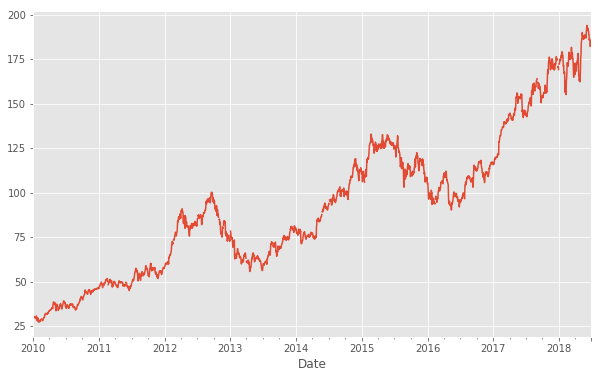

In [8]:
data['AAPL.O'].plot(figsize = (10,6))

In [9]:
#fully vectorized operation for log return calculation
rets = (np.log(data['AAPL.O'])).diff()

### 4.1 Calculating Moving Average

In [10]:
# fully vectorized calculation of 50 days moving average/trend
data['MA50'] = data['AAPL.O'].rolling(50).mean()

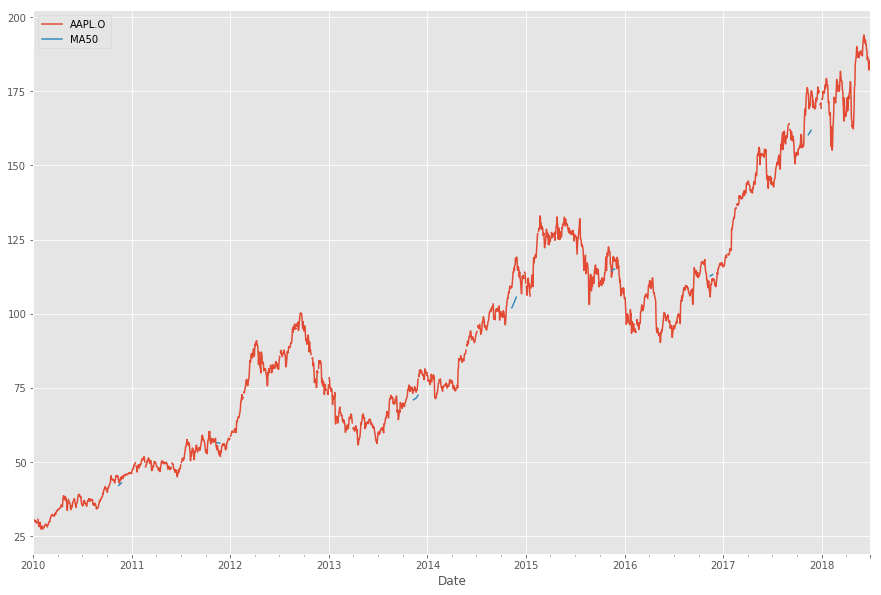

In [11]:
data[['AAPL.O', 'MA50']].plot(figsize = (15,10))

As you can see, due to NaN values, there are only few periods in time where the 50 day moving average can be calculated.
Let's try two methods to discard NaN values so we can obtain a continuous moving average. 

**Method 1: drop all NaN values**

In [12]:
data.drop('MA50', axis = 1, inplace = True)
dataNoNA = data.dropna()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


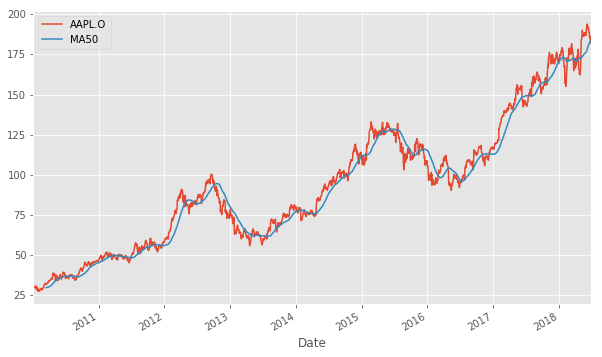

In [13]:
dataNoNA['MA50'] = dataNoNA['AAPL.O'].rolling(50).mean()
dataNoNA[['AAPL.O', 'MA50']].plot(figsize=(10,6))

**Method 2: replace NaN values with the first non-NaN value that follows using backfill method**

In [14]:
dataBfillNaN = data.fillna(method = 'bfill')

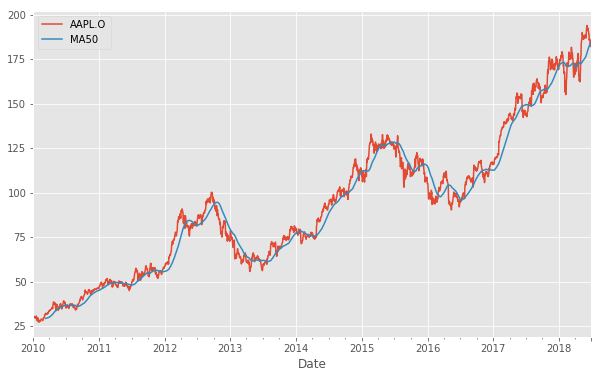

In [15]:
dataBfillNaN['MA50'] = dataBfillNaN['AAPL.O'].rolling(50).mean()
dataBfillNaN[['AAPL.O', 'MA50']].plot(figsize=(10,6))

Let's see the difference between the two methods

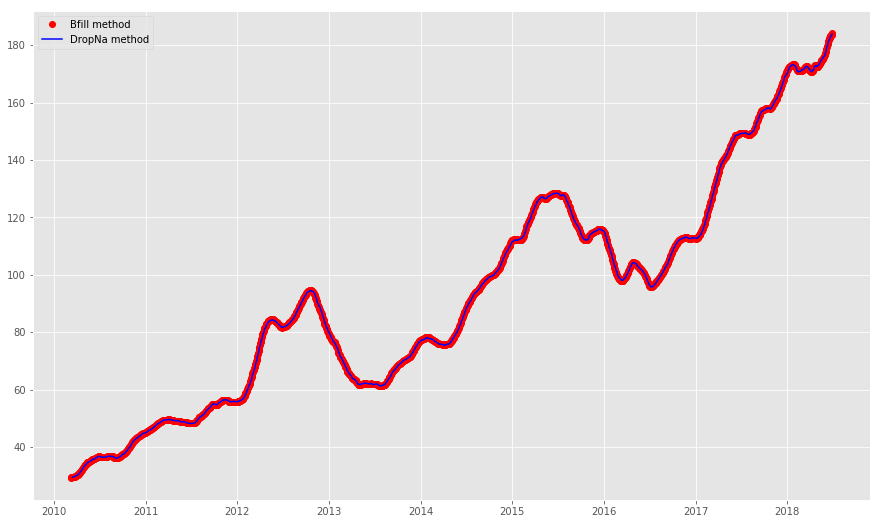

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 9)
plt.plot(dataBfillNaN['MA50'],'ro', label= 'Bfill method')
plt.plot(dataNoNA['MA50'],'b-', label = 'DropNa method')
plt.legend()
plt.show()

Seems like the two methods generate nearly identical results

#### 4.2 Moving Average and Volatility

Just out of curiosity, i would like to see how many times APPL stock price dropped more than 2 STD of the 50 20 day moving average

Between 2014 and 2016, AAPL stock price dropped more than 2 STD of the 50 days moving average 28 times 


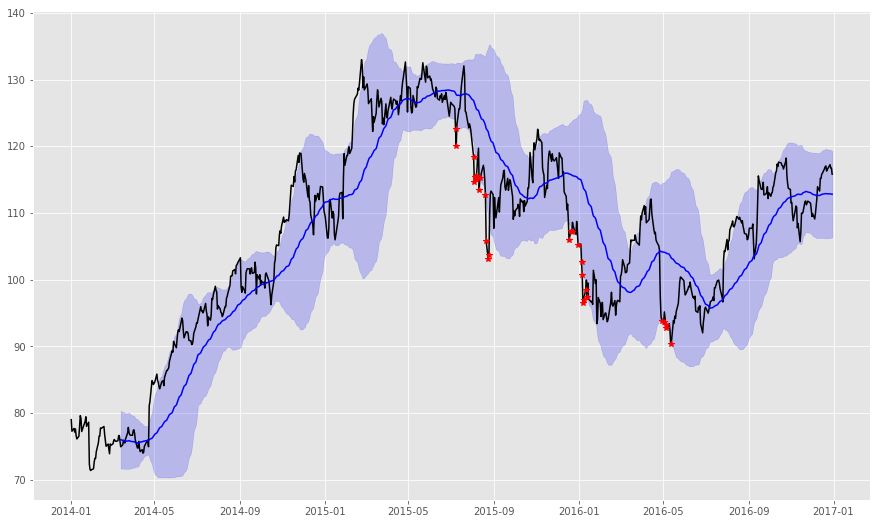

In [17]:
rollingPeriodDays = 50
startYear = '2014'
endYear = '2016'
ma = dataNoNA.loc[startYear:endYear,'AAPL.O'].rolling(rollingPeriodDays).mean()
mstd = dataNoNA.loc[startYear:endYear,'AAPL.O'].rolling(rollingPeriodDays).std()

plt.figure()
plt.plot(ma.index, dataNoNA.loc[startYear:endYear,'AAPL.O'], "k")
plt.plot(ma.index, ma, "b")
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color = "b",alpha = 0.2)
lowerBand = ma-2*mstd
counter = 0
for i in dataNoNA.loc[startYear:endYear,'AAPL.O'].index:
    if dataNoNA.loc[i, 'AAPL.O'] < lowerBand.loc[i]:
        plt.plot(i, dataNoNA.loc[i, 'AAPL.O'] , 'r*')
        counter +=1 
print(f"Between {startYear} and {endYear}, AAPL stock price dropped more than 2 STD of the {rollingPeriodDays} days moving average {counter} times ")


#### 4.3 Volatility via boxplots

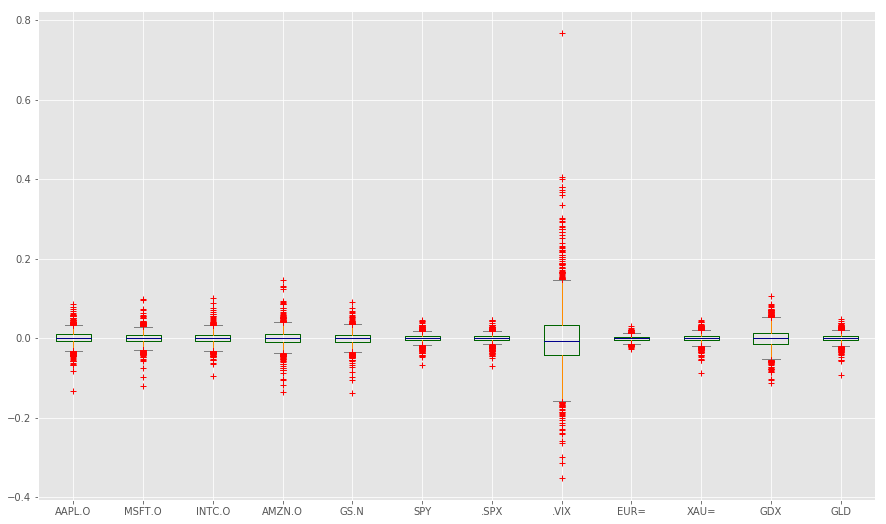

In [18]:

color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
(np.log(data)).diff().plot.box(color = color, sym = "r+")

Box plot suggest that VIX has the most volatile returns. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EFF27CA358>,
      dtype=object)

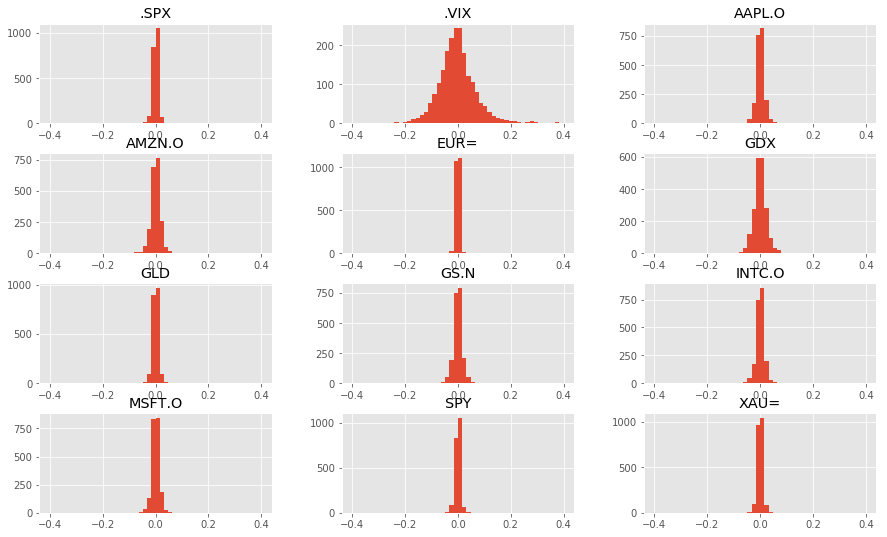

In [19]:
(np.log(data)).diff().hist(bins = 50,  range=[-0.4, 0.4])
#A quick way to see which assets have the highest log return volatility

Another way to visualize the log returns of each stock and compare. 
I find boxplot useful to visualize the volatility. The histogram is more useful to visualize distribution. Let's plot the histogram again without constraining the x-axis scale.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EFF2376EB8>,
      dtype=object)

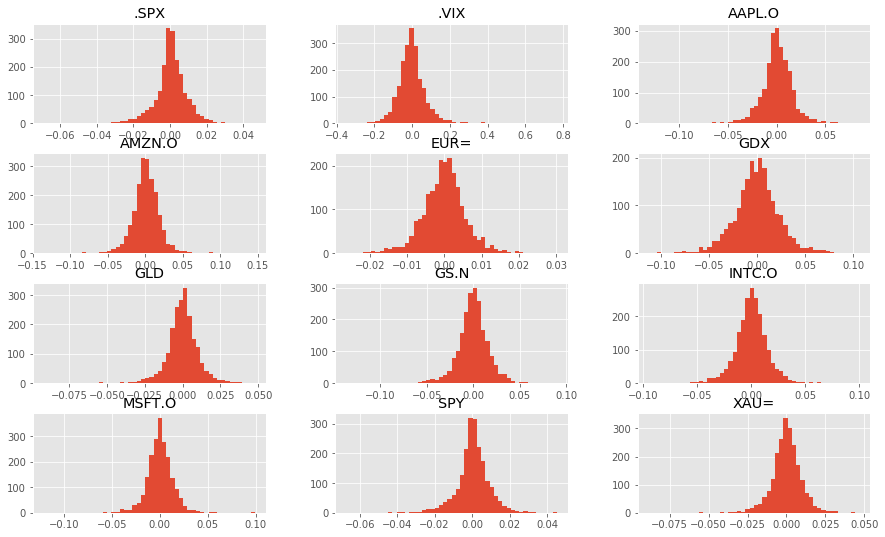

In [20]:
(np.log(data)).diff().hist(bins = 50)


The plot shows how some stock have a wider distribution around the mean, such as GS.N and INTC.O. I can also see some skewness such as AAPL.O (to the positive side).
Though it is useful to do this visual/qualitative inspection. It would be more insightful to undertake a quantiative comparison. 

#### 4.4 Other

There are some other interesting plots that i will list here. I will not go in detail as this is not the objective of this module.

##### 4.4.1 Lagplots

Lag plots are drawn by plotting the timeseries data on the x-axis and the lagged version of the same timeseries on the y-axis. Lagplots allow to search for patterns in data such as randomness, trends and seasonality

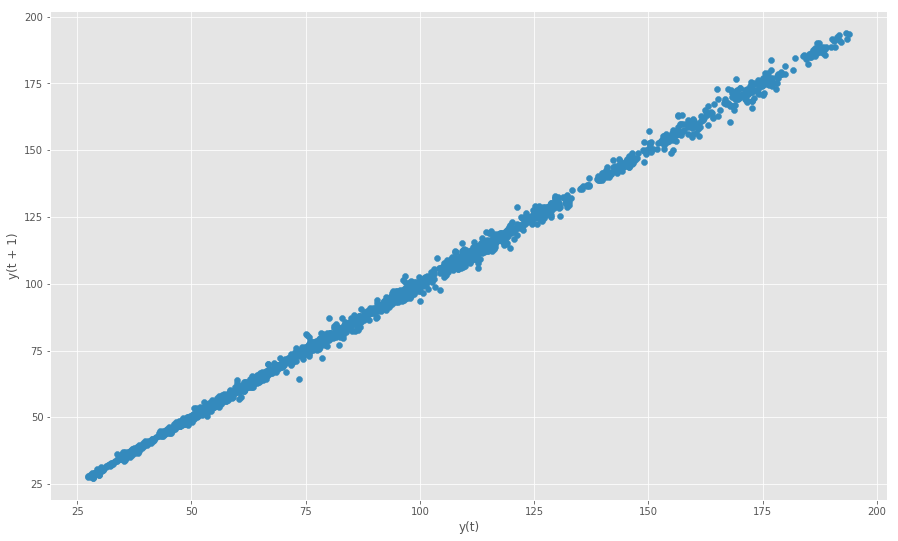

In [21]:
from pandas.plotting import lag_plot

plt.figure();


lag_plot(dataNoNA['AAPL.O'], lag = 1);


Lag plot showing high auto-correlation in Apple stock price

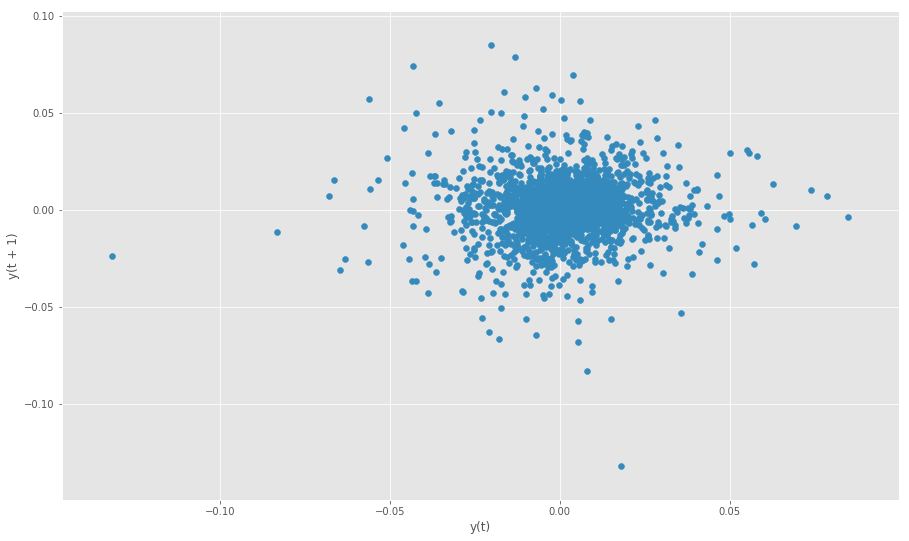

In [22]:
lag_plot(rets, lag = 1)

The lag plot of AAPL returns suggests that there is no auto-correlation. 

##### 4.4.2 Autocorrelation plots

These are commonly used to check for randomness in a dataset. 

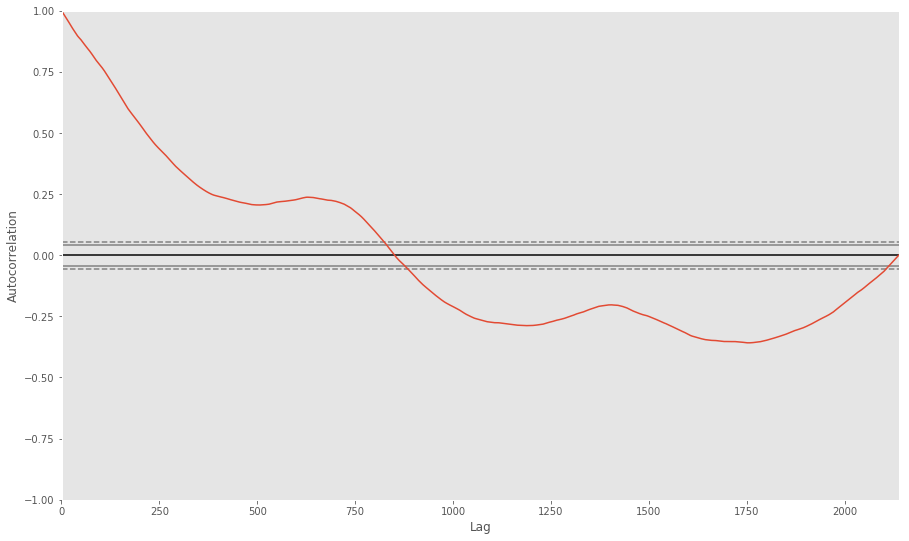

In [23]:
from pandas.plotting import autocorrelation_plot

plt.figure();

autocorrelation_plot(dataNoNA['AAPL.O']);

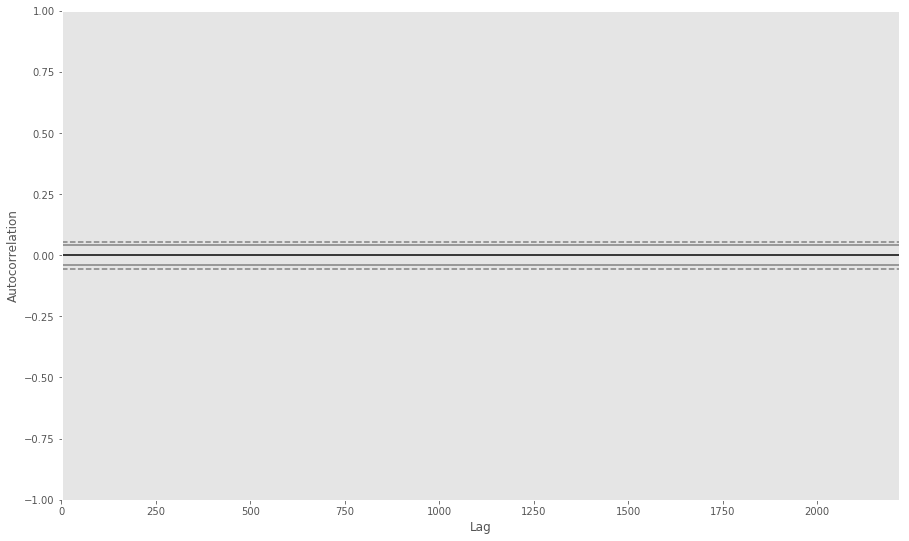

In [24]:
autocorrelation_plot(rets);

##### 4.4.3 Bootstrap plots

The bootstrap plot is used to estimate the uncertainty of a statistic.
The bootstrap plot is used to answer the following questions:
* What does the sampling distribution for the statistic look like?
* What is a 95% confidence interval for the statistic?
* Which statistic has a sampling distribution with the smallest variance? That is, which statistic generates the narrowest confidence interval?
To know more. Check out: 
https://www.itl.nist.gov/div898/handbook/eda/section3/bootplot.htm#:~:text=The%20bootstrap%20(Efron%20and%20Gong,the%20uncertainty%20of%20a%20statistic.&text=To%20generate%20a%20bootstrap%20uncertainty,and%20the%20statistic%20is%20calculated.

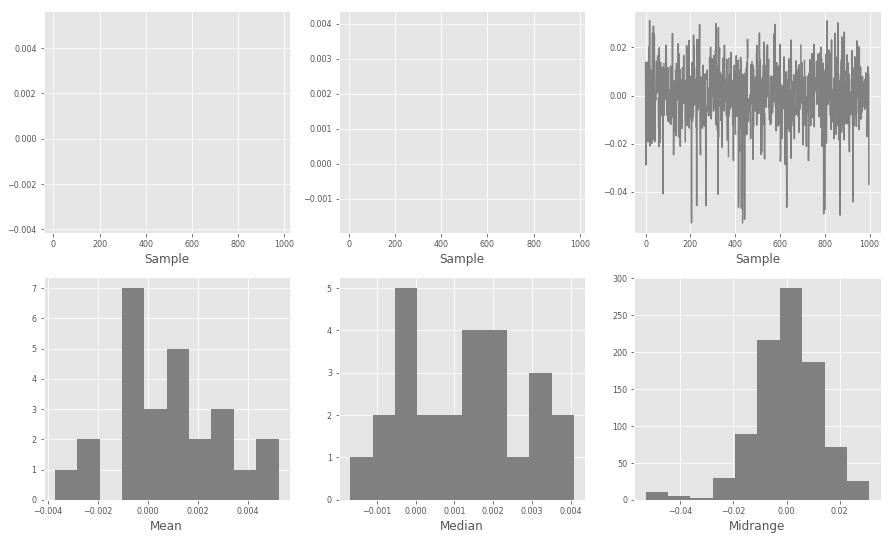

In [28]:
from pandas.plotting import bootstrap_plot


bootstrap_plot(rets, size=50, samples=1000, color="grey");

##### 4.4.4 Exponential Moving Average

Exponential moving average (EMA) is similar to the simple moving average (SMA). The main difference is that SMA applies equal weighting to all elements while EPA applies larger weights to more current elements. Therefore, for the same period, EPA reacts faster to most recent price changes than SMA.

In [26]:
s = pd.DataFrame([-1,-1,3,2,4], index = list('abcde'))

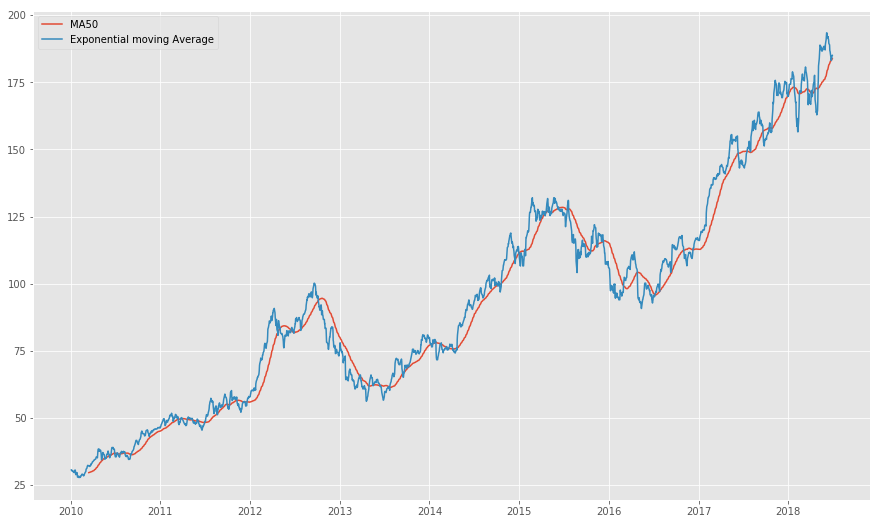

In [27]:
plt.rcParams['figure.figsize'] = (15, 9)

plt.plot(dataNoNA['MA50'])
plt.plot((data['AAPL.O'].ewm(com = 0.5).mean()), label = 'Exponential moving Average')
plt.legend()
plt.show()